<a href="https://colab.research.google.com/github/KoHa2/DeepLearning/blob/main/RabbitCharange/Stage3/2_4_optimizer_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/E/03.stage3/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/My Drive/E/03.stage3/DNN_code_colab_lesson_1_2/lesson_2')

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.1
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.15
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.17
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.18
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.07
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.16
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.09
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.12
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.09
                : 130. 正答率(テスト) = 0.1135
Generati

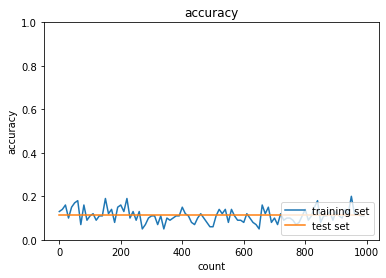

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.098
Generation: 30. 正答率(トレーニング) = 0.06
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.1032
Generation: 50. 正答率(トレーニング) = 0.09
                : 50. 正答率(テスト) = 0.1009
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.1467
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.0958
Generation: 80. 正答率(トレーニング) = 0.14
                : 80. 正答率(テスト) = 0.1844
Generation: 90. 正答率(トレーニング) = 0.15
                : 90. 正答率(テスト) = 0.1303
Generation: 100. 正答率(トレーニング) = 0.17
                : 100. 正答率(テスト) = 0.1972
Generation: 110. 正答率(トレーニング) = 0.21
                : 110. 正答率(テスト) = 0.2276
Generation: 120. 正答率(トレーニング) = 0.32
                : 120. 正答率(テスト) = 0.2479
Generation: 130. 正答率(トレーニング) = 0.27
                : 130. 正答率(テスト) = 0.2734
Generati

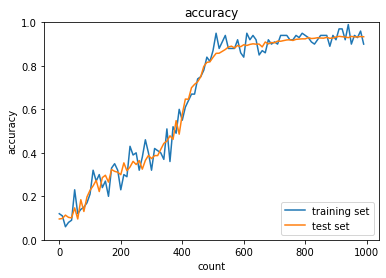

In [4]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.0974
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.0974
Generation: 30. 正答率(トレーニング) = 0.09
                : 30. 正答率(テスト) = 0.0974
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.1
                : 50. 正答率(テスト) = 0.1116
Generation: 60. 正答率(トレーニング) = 0.17
                : 60. 正答率(テスト) = 0.2052
Generation: 70. 正答率(トレーニング) = 0.22
                : 70. 正答率(テスト) = 0.2038
Generation: 80. 正答率(トレーニング) = 0.33
                : 80. 正答率(テスト) = 0.2823
Generation: 90. 正答率(トレーニング) = 0.21
                : 90. 正答率(テスト) = 0.2194
Generation: 100. 正答率(トレーニング) = 0.26
                : 100. 正答率(テスト) = 0.2285
Generation: 110. 正答率(トレーニング) = 0.24
                : 110. 正答率(テスト) = 0.2415
Generation: 120. 正答率(トレーニング) = 0.21
                : 120. 正答率(テスト) = 0.1407
Generation: 130. 正答率(トレーニング) = 0.21
                : 130. 正答率(テスト) = 0.2946
Generatio

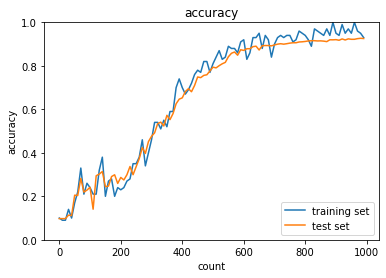

In [5]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.0892
Generation: 20. 正答率(トレーニング) = 0.28
                : 20. 正答率(テスト) = 0.2097
Generation: 30. 正答率(トレーニング) = 0.25
                : 30. 正答率(テスト) = 0.1923
Generation: 40. 正答率(トレーニング) = 0.34
                : 40. 正答率(テスト) = 0.3123
Generation: 50. 正答率(トレーニング) = 0.48
                : 50. 正答率(テスト) = 0.392
Generation: 60. 正答率(トレーニング) = 0.51
                : 60. 正答率(テスト) = 0.4439
Generation: 70. 正答率(トレーニング) = 0.56
                : 70. 正答率(テスト) = 0.5018
Generation: 80. 正答率(トレーニング) = 0.58
                : 80. 正答率(テスト) = 0.566
Generation: 90. 正答率(トレーニング) = 0.63
                : 90. 正答率(テスト) = 0.5463
Generation: 100. 正答率(トレーニング) = 0.67
                : 100. 正答率(テスト) = 0.6129
Generation: 110. 正答率(トレーニング) = 0.74
                : 110. 正答率(テスト) = 0.7063
Generation: 120. 正答率(トレーニング) = 0.72
                : 120. 正答率(テスト) = 0.644
Generation: 130. 正答率(トレーニング) = 0.75
                : 130. 正答率(テスト) = 0.6975
Generation

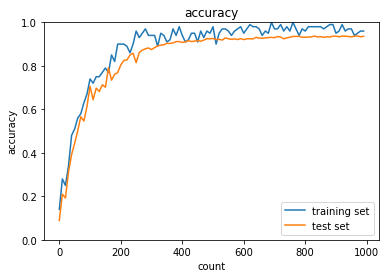

In [6]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.07
                : 20. 正答率(テスト) = 0.1062
Generation: 30. 正答率(トレーニング) = 0.19
                : 30. 正答率(テスト) = 0.2005
Generation: 40. 正答率(トレーニング) = 0.22
                : 40. 正答率(テスト) = 0.2122
Generation: 50. 正答率(トレーニング) = 0.24
                : 50. 正答率(テスト) = 0.2157
Generation: 60. 正答率(トレーニング) = 0.19
                : 60. 正答率(テスト) = 0.2341
Generation: 70. 正答率(トレーニング) = 0.25
                : 70. 正答率(テスト) = 0.2243
Generation: 80. 正答率(トレーニング) = 0.27
                : 80. 正答率(テスト) = 0.2678
Generation: 90. 正答率(トレーニング) = 0.36
                : 90. 正答率(テスト) = 0.2796
Generation: 100. 正答率(トレーニング) = 0.38
                : 100. 正答率(テスト) = 0.3401
Generation: 110. 正答率(トレーニング) = 0.49
                : 110. 正答率(テスト) = 0.4353
Generation: 120. 正答率(トレーニング) = 0.46
                : 120. 正答率(テスト) = 0.4497
Generation: 130. 正答率(トレーニング) = 0.51
                : 130. 正答率(テスト) = 0.5432
Generat

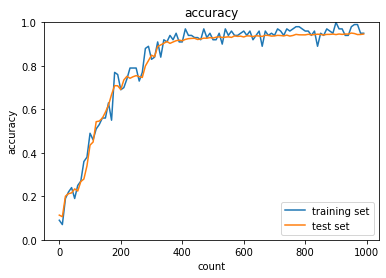

In [7]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] 活性化関数と重みの初期化方法を変更して違いを見てみよう
初期状態ではsigmoid - gauss<br>
activationはReLU、weight_init_stdは別の数値や'Xavier'・'He'に変更可能

## [try] バッチ正規化をして変化を見てみよう
use_batchnormをTrueにしよう

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------